**Problem 0**

Run the cell below to make sure you are in the data1030 coding environment. 

We will deduct 2 points for every missing OK sign. (If you don't run the cell, that's -14 points.)


In [1]:
from __future__ import print_function
from distutils.version import LooseVersion as Version
import sys

OK = '\x1b[42m[ OK ]\x1b[0m'
FAIL = "\x1b[41m[FAIL]\x1b[0m"

try:
    import importlib
except ImportError:
    print(FAIL, "Python version 3.9 is required,"
                " but %s is installed." % sys.version)

def import_version(pkg, min_ver, fail_msg=""):
    mod = None
    try:
        mod = importlib.import_module(pkg)
        if pkg in {'PIL'}:
            ver = mod.VERSION
        else:
            ver = mod.__version__
        if Version(ver) == min_ver:
            print(OK, "%s version %s is installed."
                  % (lib, min_ver))
        else:
            print(FAIL, "%s version %s is required, but %s installed."
                  % (lib, min_ver, ver))    
    except ImportError:
        print(FAIL, '%s not installed. %s' % (pkg, fail_msg))
    return mod


# first check the python version
pyversion = Version(sys.version)
if pyversion >= "3.9":
    print(OK, "Python version is %s" % sys.version)
elif pyversion < "3.9":
    print(FAIL, "Python version 3.9 is required,"
                " but %s is installed." % sys.version)
else:
    print(FAIL, "Unknown Python version: %s" % sys.version)

    
print()
requirements = {'numpy': "1.21.1", 'matplotlib': "3.4.2",'sklearn': "0.24.2", 
                'pandas': "1.3.1",'xgboost': "1.3.3", 'shap': "0.39.0"}

# now the dependencies
for lib, required_version in list(requirements.items()):
    import_version(lib, required_version)

[ OK ] Python version is 3.9.7 | packaged by conda-forge | (default, Sep 14 2021, 01:11:01) [MSC v.1916 64 bit (AMD64)]

[ OK ] numpy version 1.21.1 is installed.
[ OK ] matplotlib version 3.4.2 is installed.
[ OK ] sklearn version 0.24.2 is installed.
[ OK ] pandas version 1.3.1 is installed.
[ OK ] xgboost version 1.3.3 is installed.
[ OK ] shap version 0.39.0 is installed.


**Problem 1**

One ML algorithm we didn't cover during class is the nearest neighbor algorithm. The principle behind nearest neighbor methods is to find a predefined number of training samples closest in distance to the new point, and predict the label from these nearest neighbors. The number of samples can be a user-defined constant (k-nearest neighbor learning), or vary based on the local density of points (distance-based neighbor learning). The distance can, in general, be any distance metric: standard Euclidean distance is the most common choice.

Read more about this method [here](https://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbors-classification) and [here](https://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbors-regression).

**Problem 1a** (8 points)

Nearest neighbor regression. Please import KNeighborsRegressor and read the manual. Let's study how the `n_neighbors` parameter impact the prediction.

Please recreate the simple regression dataset from the lecture notes (n_samples = 30 with a cos function). (0 points)

Prepare a plot that shows predictions for n_neighbors = 1, 3, 10, and 30. (2 points)

Answer the following questions and explain your answer. (4 points)
   - What `n_neighbors` value produces a high bias (low variance) model? What `n_neighbors` value produces a high variance (low bias) model? How do overfitting and underfitting manifest in nearest neighbor?
   - How does the model behave with respect to outliers?
   - Explain why the model prediction is a step function and how this step function differs from a decision tree step function?

Based on the manual, what other parameter has a strong influence on the predictions? Prepare another figure to prove your point. (2 points)

In [4]:
from sklearn.neighbors import KNeighborsRegressor
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


# sample from class material

np.random.seed(10)
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

n_samples = 30

X = np.random.rand(n_samples)
y = true_fun(X) + np.random.randn(n_samples) * 0.1

# reshaping training data
X_train = np.reshape(X,(len(X),1))
y_train = np.reshape(y,(len(y),1))

# making n's list and samples for the prediction
n= [1,3,10,30]
X_test = np.linspace(min(X)-0.5, max(X)+0.5, 100)

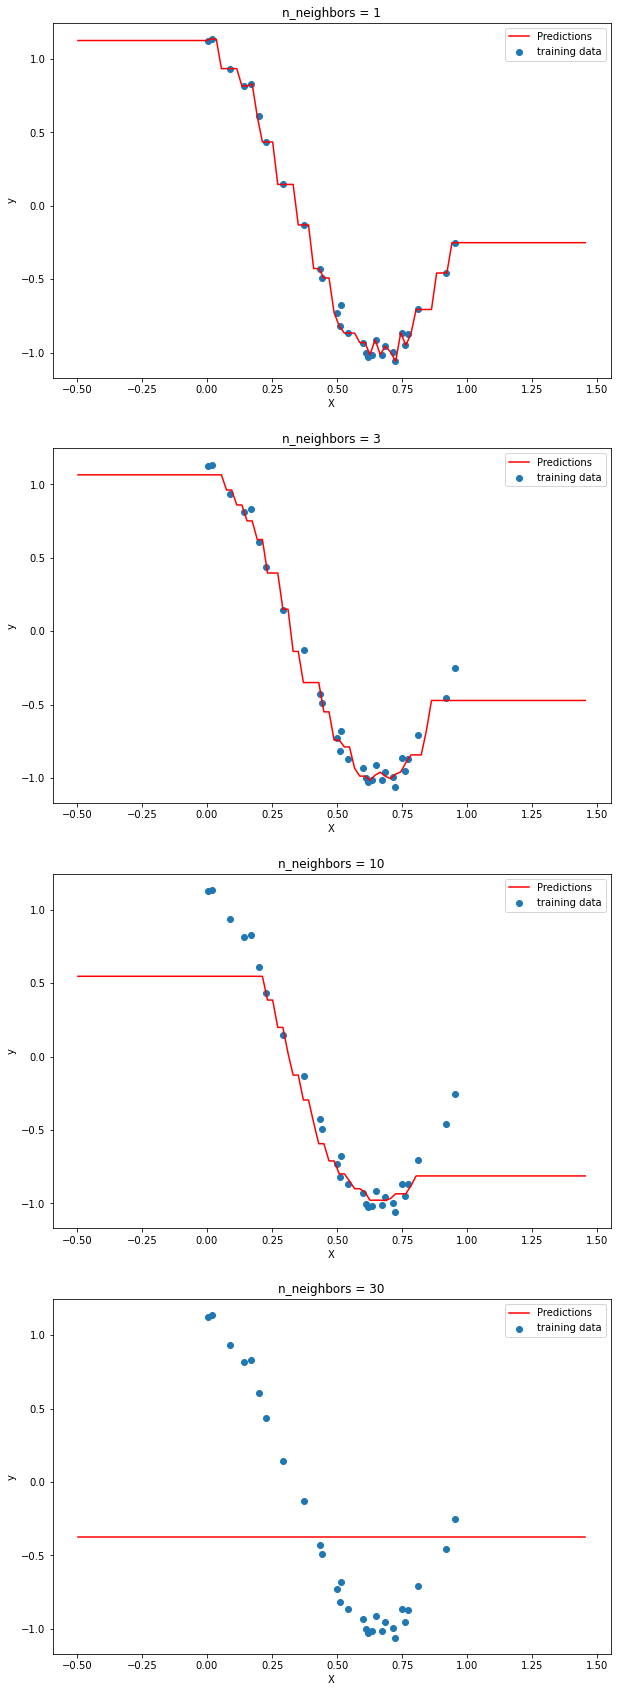

In [10]:
plt.figure(figsize=(10,30))

# plotting
for i in range(0,4,1) : 
    plt.subplot(4,1,i+1)
    knr = KNeighborsRegressor(n_neighbors=n[i],n_jobs=-1)
    knr.fit(X_train,y_train)
    y_test=knr.predict(np.reshape(X_test, (len(X_test), 1)))
    plt.xlabel('X')
    plt.ylabel('y')
    plt.scatter(X,y,label='training data')
    plt.plot(X_test,y_test, label='Predictions', color='red')
    tt= "n_neighbors = " + str(n[i])
    plt.title(tt)
    plt.legend()

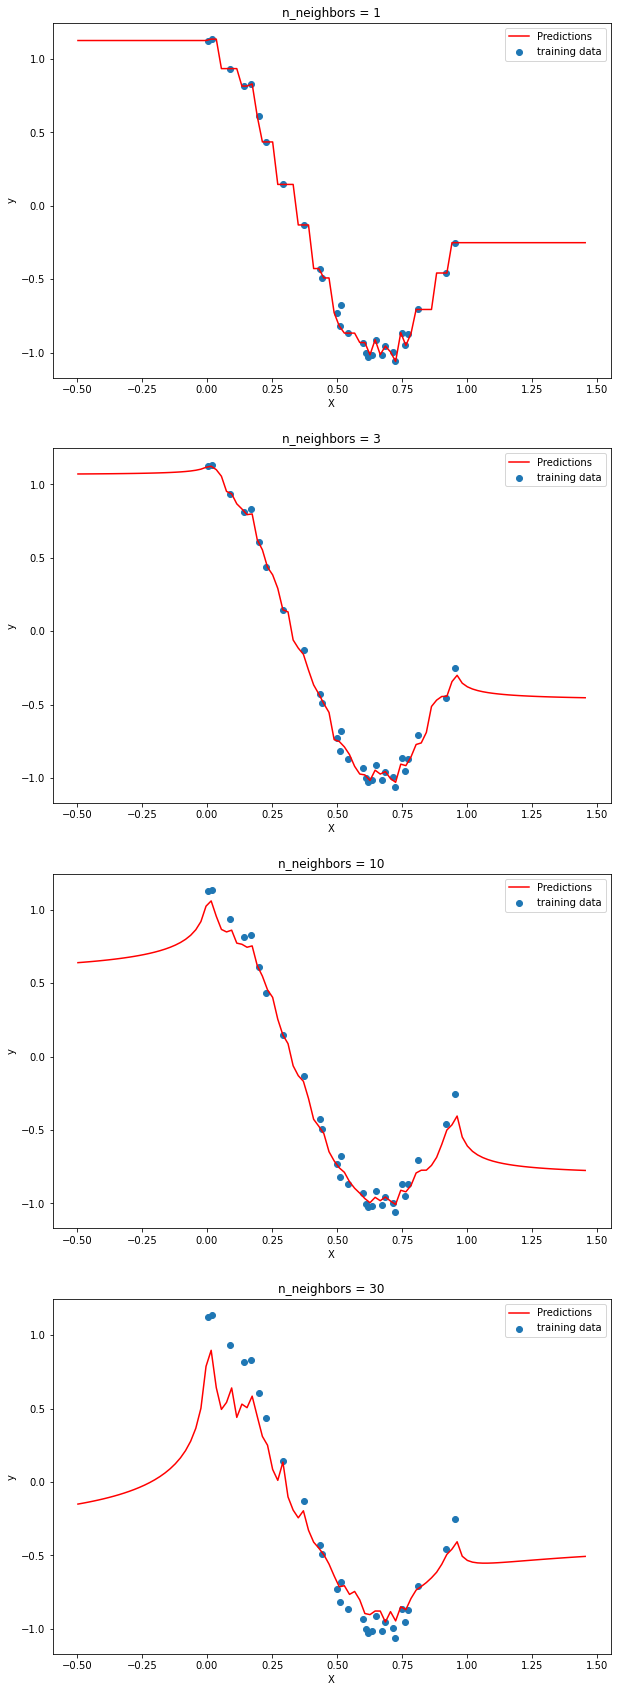

In [11]:
plt.figure(figsize=(10,30))

# Chainging the parameter of weights from uniform to distance 
for i in range(0,4,1) : 
    plt.subplot(4,1,i+1)
    knr = KNeighborsRegressor(n_neighbors=n[i],n_jobs=-1, weights='distance')
    knr.fit(X_train,y_train)
    y_test=knr.predict(np.reshape(X_test, (len(X_test), 1)))
    plt.xlabel('X')
    plt.ylabel('y')
    plt.scatter(X,y,label='training data')
    plt.plot(X_test,y_test, label='Predictions', color='red')
    tt= "n_neighbors = " + str(n[i])
    plt.title(tt)
    plt.legend()

**Answers for the Problem 1a** 

Q1 :What n_neighbors value produces a high bias (low variance) model? What n_neighbors value produces a high variance (low bias) model? How do overfitting and underfitting manifest in nearest neighbor?

**A1 : When n(=n_neighbors) is 1 , the model has low bias and high variance while the model with 30 of n has high bias and low variance. In the nearest neighbor way, the model with a small number of n is more likely to have low bias and high variance while the model with a larger number of n is more likely to have low variance and high bias.**

Q2 : How does the model behave with respect to outliers?

**A2 : If n(=n_neighbors) is low, the model is susceptible to outliers while  the model is robust to outliers if n is high. The reason why the model with higher n is less likely to be affected by outliers is that the impact from outliers becomes smaller as the average's demoninator(=n) is larger**

Q3 : Explain why the model prediction is a step function and how this step function differs from a decision tree step function?

**A3 : If an value of the domain of the function continously increases, the combination of nearest neighors with a certain number of neighers should be changed in a certain X value and the prediction in the interval between two chaning points is constant. So, this model is a step fuction.**  
   **The decision tree is not affected by a part of feature(=n_neighors), like KNN, but by the overall distribution of training set.**      
   
Q4. Based on the manual, what other parameter has a strong influence on the predictions? Prepare another figure to prove your point.

**A4 : I change the weight parameter from uniform to weight. If the model weigh more on closer neighers, we can reduce the possibility of underfitting when n_neighors increases.**  

**Problem 1b** (5 points)

Nearest neighbor classification. Please import KNeighborsClassifier and read the manual. Let's study how the `n_neighbors` parameters impact the prediction.

Please recreate the simple classification dataset from the lecture notes (makemoons). (0 points)

Prepare a plot that shows predictions for n_neighbors = 1, 10, 30, and 100. (2 points)

Prepare another plot with the same n_neighbors values but `weights` set to distance. (1 point)

What is the biggest difference between the predicted probabilities of the two models? Explain your answer. (2 points)

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_moons
import matplotlib
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
matplotlib.rcParams.update({'font.size': 10})



# create the data from course matrials 

X,y = make_moons(noise=0.2, random_state=1,n_samples=200)

X = StandardScaler().fit_transform(X)

h = .02  # step size in the mesh

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))


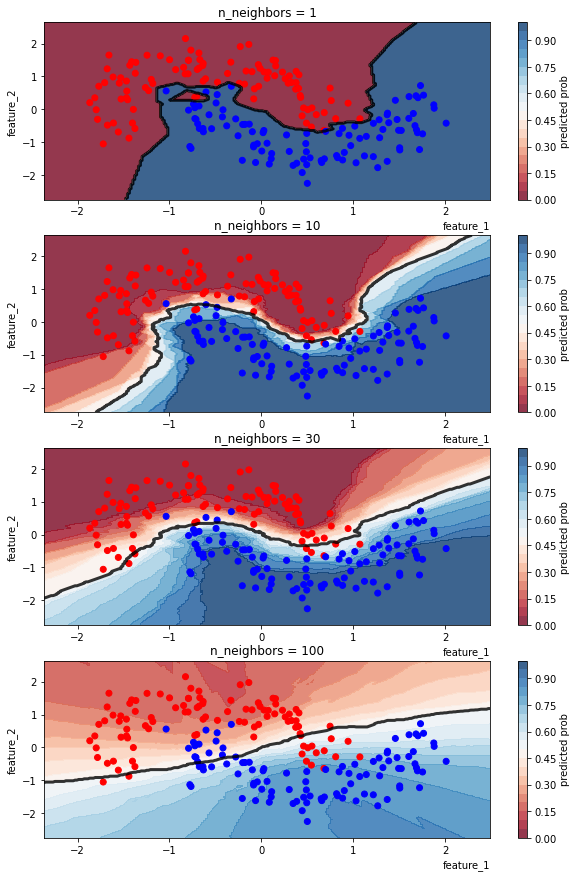

In [7]:

plt.figure(figsize=(10,15))
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
cm = plt.cm.RdBu

n= [1,10,30,100]

for i in range(0,len(n),1) : 
    plt.subplot(4,1,i+1)
    # making a model
    knc =  KNeighborsClassifier(n_neighbors=n[i],n_jobs=-1)
    knc.fit(X,y)
    Z = knc.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=cm, alpha=.8,vmin=0,vmax=1,levels=np.arange(0,1.05,0.05))
    plt.colorbar(label='predicted prob')
    plt.contour(xx, yy, Z, alpha=.8,vmin=0,vmax=1,levels=[0.5],colors=['k'],linewidths=3)
    plt.scatter(X[:, 0], X[:, 1], c=y,cmap=cm_bright)
    plt.xlabel('feature_1', loc='right')
    plt.ylabel('feature_2')
    tt= "n_neighbors = " + str(n[i])
    plt.title(tt)

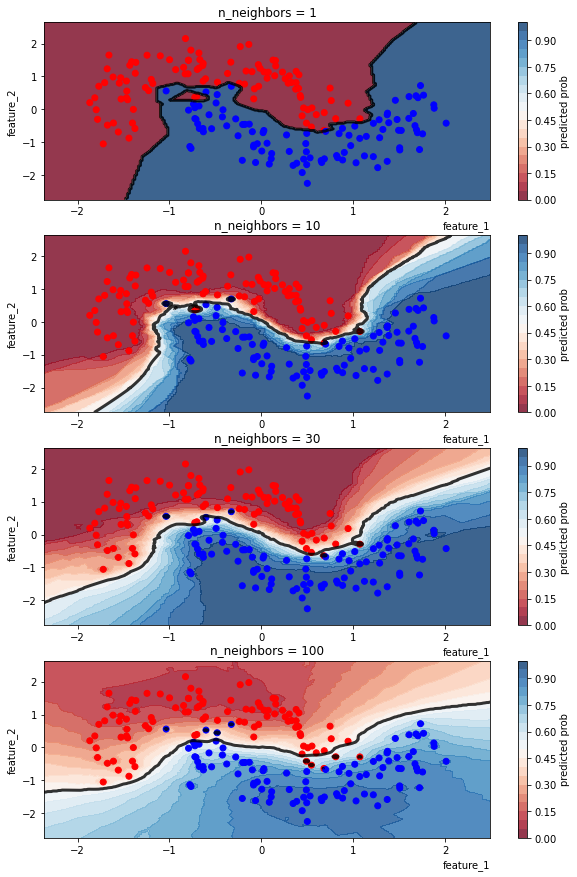

In [9]:
# making the model with a change in weight parameter to distance

matplotlib.rcParams.update({'font.size': 10})

# create the data
X,y = make_moons(noise=0.2, random_state=1,n_samples=200)

X = StandardScaler().fit_transform(X)

h = .02  # step size in the mesh

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

plt.figure(figsize=(10,15))
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
cm = plt.cm.RdBu


n= [1,10,30,100]


for i in range(0,len(n),1) : 
    plt.subplot(4,1,i+1)
    knc =  KNeighborsClassifier(n_neighbors=n[i],n_jobs=-1, weights='distance')
    knc.fit(X,y)
    Z = knc.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=cm, alpha=.8,vmin=0,vmax=1,levels=np.arange(0,1.05,0.05))
    plt.colorbar(label='predicted prob')
    plt.contour(xx, yy, Z, alpha=.8,vmin=0,vmax=1,levels=[0.5],colors=['k'],linewidths=3)
    plt.scatter(X[:, 0], X[:, 1], c=y,cmap=cm_bright)
    plt.xlabel('feature_1', loc='right')
    plt.ylabel('feature_2')
    tt= "n_neighbors = " + str(n[i])
    plt.title(tt)





**Answers for the Problem 1b** 

Q1. Please recreate the simple classification dataset from the lecture notes (makemoons). (0 points)

**I made it above**

Q2. Prepare a plot that shows predictions for n_neighbors = 1, 10, 30, and 100. (2 points)

**I made it above**

Q3. Prepare another plot with the same n_neighbors values but weights set to distance. (1 point)

**I made it above**

Q4. What is the biggest difference between the predicted probabilities of the two models? Explain your answer. (2 points)

**When n=1, two models are identical. However, as the n increases, the degree of bias in the second model(=distance weight model) becomes smaller than in the first model(=uniform distance model). We can reduce the underfitting when n is large by leveraging "distance weights"**

**Problem 2**

You will work with the diabetes dataset and try different ML algorithms on it to figure out which one is the best. Whenever you work with a new dataset, you want to try as many algorithms on it as possible because you can't know in advance which algorithm (and hyperparameters) will be the best.

Generally you need to decide five things when you build an ML pipeline:
- your splitting strategy
- how to preprocess the data
- what evaluation metric you'll use
- what ML algorithms you will try
- what paramater grid you should use for each ML algorithm

You'll write a function in problem 2a that takes a preprocessor, an ML algorithm, and its corresponding parameter grid as inputs and it will calculate test scores and return the best models. The splitting strategy and the evaluation metric are not inputs to this function but predefined.

**Problem 2a** (10 points)

Write a function which takes the unprocessed feature matrix, target variable, a preprocessor (ColumnTransformer), an initialized ML algorithm, and a correspondig parameter grid as inputs. Inside the function, split the data to other and test (80-20) and then use KFold with 4 folds. Then preprocess the data and perform cross validation (I recommend you use GridSearchCV), then calculate the test score. Use RMSE as your evaluation metric. Repeat this 10 times for 10 different random states, and the function should return the 10 best models and the 10 test scores. The skeleton of the function is provided for convenince.

The function name contains the splitting strategy and the evaluation metric. It would be difficult (but not impossible) to write a general `MLpipe` function that takes a splitter and an evaluation metric also as inputs for two reasons:
- some splitters are difficult to pass as a function argument (e.g., two train_test_split steps, or a train_test_split combined with a KFold),
- some evaluation metrics need to be maximized (like accuracy, R2, f_beta), while others need to be minimized (like logloss, RMSE) and the code for these two options differ.

For now, I recommend that if you need to try multiple ML algorithms, write a function that's specific to a splitting strategy and an evaluation metric and add a description to the function as shown in MLpipe_KFold_RMSE. Such functions make it very easy to try many ML algorithms on your dataset and I recommend you write a similar function for your project.

In [13]:
# import packages

import pandas as pd
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import ColumnTransformer

In [14]:
# load data
url = 'C:/Users/josh/DATA1030-Fall2021/ps4-prep-josh7197/diabetes.csv'
dataset = pd.read_csv(url)
y= dataset['Y']
X= dataset.loc[:, dataset.columns != 'Y']

In [15]:
# making function

def MLpipe_KFold_RMSE(X, y, preprocessor, ML_algo, param_grid):  
      
    scores = []
    models = []
    
    for i in range(10) :
        
        # spiltting the dataset
        X_other, X_test, y_other, y_test = train_test_split(X,y,train_size = 0.8,random_state=i*10)
        
        # making K-folds
        kf = KFold(n_splits=4,shuffle=True,random_state=i*10)
        pl = Pipeline(steps=[('preprocessor', preprocessor),('model', ML_algo)])
        
        #cross validation with MSE evaluation
        gsc = GridSearchCV(pl, param_grid=param_grid, scoring='neg_mean_squared_error',
                            cv=kf, return_train_score=True, n_jobs=-1)
        
        gsc.fit(X_other, y_other)
        
        # finding the best parameters
        best_param = gsc.best_params_
        
        # yielding testing score 
        test_score = mean_squared_error(y_test, gsc.predict(X_test), squared=False)
        
        # collecting all scores and best models per each random state 
        scores.append(test_score)
        models.append(gsc.best_estimator_)
    return models, scores
    
 


In [16]:
# preprocessing

ctg_ftr = ['SEX']
std_ftr = ['AGE', 'BMI', 'BP', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6']
preprocessor = ColumnTransformer(transformers=[('std', StandardScaler(), std_ftr), ('onehot', OneHotEncoder(sparse=False), ctg_ftr)])

**Lasso**

In [17]:
ML_algo = Lasso()
param_grid = {'model__alpha': np.logspace(-2,2,21)}
models, scores = MLpipe_KFold_RMSE(X,y,preprocessor,ML_algo,param_grid)

In [19]:
for i in range(0,len(scores),1) :
    print("Best model")
    print("----------------------------------------------------------")
    print(models[i])
    print("----------------------------------------------------------")
    print("Best score is  ", scores[i])
    print("----------------------------------------------------------")

Best model
----------------------------------------------------------
Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('std', StandardScaler(),
                                                  ['AGE', 'BMI', 'BP', 'S1',
                                                   'S2', 'S3', 'S4', 'S5',
                                                   'S6']),
                                                 ('onehot',
                                                  OneHotEncoder(sparse=False),
                                                  ['SEX'])])),
                ('model', Lasso(alpha=0.6309573444801934))])
----------------------------------------------------------
Best score is   58.53770905767053
----------------------------------------------------------
Best model
----------------------------------------------------------
Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('std', StandardScaler(),
                  

**Problem 2b** (16 points)

Then train following models on the diabetes dataset:
- linear regression with l1 regularization (already completed in 2a)
- linear regression with l2 regularization (2 points)
- linear regression with an elastic net (3 points)
- RF (4 points)
- SVR (3 points)
- k nearest neighbor regression (3 points)

Please determine what the parameter grid should be for each of these methods. Please follow the guidance from the previous exercises and the lecture notes.

Make sure your code is reproducable! When you rerun it, you should get back the exact same test scores and best hyperparameters in each run. So fix your random states whereever necessary.

Which algorithm is the best on the diabetes dataset based on the mean and standard deviation of the test scores? Write a paragraph or two and describe your findings. (1 points)

In [20]:
# Lasso

ML_algo = Lasso()
param_grid = {'model__alpha': np.logspace(-2,2,21)}
models, scores = MLpipe_KFold_RMSE(X,y,preprocessor,ML_algo,param_grid)

print("mean is"  , np.mean(scores) )
print("standard deviation is ", np.std(scores) )

mean is 56.763732885698495
standard deviation is  3.433431749668137


**Ridge**

In [21]:
ML_algo = Ridge()
param_grid = {'model__alpha': np.logspace(-2,2,21)}
models, scores = MLpipe_KFold_RMSE(X,y,preprocessor,ML_algo,param_grid)

print("mean is"  , np.mean(scores) )
print("standard deviation is ", np.std(scores) )

mean is 56.892745041393745
standard deviation is  3.4558372209360257


**ElasticNet**

In [22]:
ML_algo = ElasticNet()
param_grid = {'model__alpha': np.logspace(-2,2,21), 'model__l1_ratio': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1], 
              'model__max_iter': [100000]}
models, scores = MLpipe_KFold_RMSE(X,y,preprocessor,ML_algo,param_grid)

print("mean is"  , np.mean(scores) )
print("standard deviation is ", np.std(scores) )

mean is 56.83506612275329
standard deviation is  3.3971640271813075


**RF**

In [23]:
ML_algo =  RandomForestRegressor()
param_grid = {'model__max_features': [1,2,3,4,5,6] , 'model__max_depth': [1,2,3,4,5,6]}
models, scores = MLpipe_KFold_RMSE(X,y,preprocessor,ML_algo,param_grid)

print("mean is"  , np.mean(scores) )
print("standard deviation is ", np.std(scores) )

mean is 58.54837711701596
standard deviation is  3.6657161965853953


**SVR**

In [26]:
ML_algo =  SVR()
param_grid = {'model__C': np.logspace(-2,2,21) , 'model__gamma': np.logspace(-2,2,21)+ ['scale']}
models, scores = MLpipe_KFold_RMSE(X,y,preprocessor,ML_algo,param_grid)

print("mean is"  , np.mean(scores) )
print("standard deviation is ", np.std(scores) )

mean is 56.55520030925597
standard deviation is  3.228818930674679


**KNN**

In [25]:
ML_algo =  KNeighborsRegressor()
param_grid = {'model__n_neighbors': [1,5,10,30,50,100] , 'model__weights': ['uniform', 'distance']}
models, scores = MLpipe_KFold_RMSE(X,y,preprocessor,ML_algo,param_grid)

print("mean is"  , np.mean(scores) )
print("standard deviation is ", np.std(scores) )

mean is 58.72007216927655
standard deviation is  3.5977424176136967


Q: Which algorithm is the best on the diabetes dataset based on the mean and standard deviation of the test scores? Write a paragraph or two and describe your findings. (1 points)

**Answer : The best model is SVR with the lowest mean(=56.55520030925597) and lowest sd(=3.228818930674679). However, all results are almost same as each other. There is no big differences. 